<a href="https://colab.research.google.com/github/avijitkalra/hello-world/blob/master/KG_28May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx as nx

**Importing (Creating) nodes from pandas dataframe**

In [0]:
import pandas as pd
import numpy as np

edges = pd.DataFrame({'source' : [0,1,1],
                      'target' : [1,2,3],
                      'weight' : [100,50,50]})

nodes = pd.DataFrame({'node' : [0,1,2,3],
                      'concept' : ['Triangle', 'Square', 'Congruency', 'Addition'],
                      'skills' : [[0.3,0.4,0.1], [0.6,0.1,0.9], [0.9,0.5,0.5],  [0.6,0.1,0.5]]})


G = nx.from_pandas_edgelist(edges, 'source', 'target', 'weight',create_using=nx.DiGraph())

**Note:** Neighbour relationship type can be added as an addtional attribute above, but that will have to be done manually, alternatively, children/parents can be printed for any node using the predecessors() / successors() functions. Relationship types can also be viewed using nx.draw(), which plots the KG.

In [0]:
nx.set_node_attributes(G, pd.Series(nodes.concept, index=nodes.node).to_dict(),'concept')
nx.set_node_attributes(G, pd.Series(nodes.skills, index=nodes.node).to_dict(),'skills')

**Drawing and Printing Nodes**

NodeDataView({0: {'concept': 'Triangle', 'skills': [0.3, 0.4, 0.1]}, 1: {'concept': 'Square', 'skills': [0.6, 0.1, 0.9]}, 2: {'concept': 'Congruency', 'skills': [0.9, 0.5, 0.5]}, 3: {'concept': 'Addition', 'skills': [0.6, 0.1, 0.5]}})

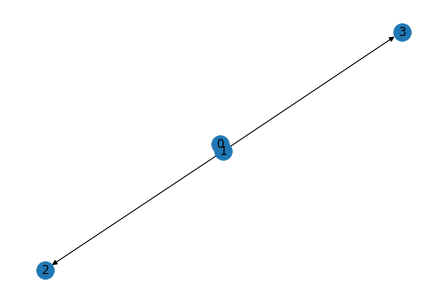

In [4]:
nx.draw(G,with_labels=True)
G.nodes(data=True)

**Editing Node Attributes**

In [5]:
G.add_node(1, concept="Circle",skills=[0.2,0.7,0.5])
G.nodes(data=True)

NodeDataView({0: {'concept': 'Triangle', 'skills': [0.3, 0.4, 0.1]}, 1: {'concept': 'Circle', 'skills': [0.2, 0.7, 0.5]}, 2: {'concept': 'Congruency', 'skills': [0.9, 0.5, 0.5]}, 3: {'concept': 'Addition', 'skills': [0.6, 0.1, 0.5]}})

**Deleting a node**

In [6]:
G.remove_node(2)
G.nodes(data=True)

NodeDataView({0: {'concept': 'Triangle', 'skills': [0.3, 0.4, 0.1]}, 1: {'concept': 'Circle', 'skills': [0.2, 0.7, 0.5]}, 3: {'concept': 'Addition', 'skills': [0.6, 0.1, 0.5]}})

**BFS**

**Pt. I- Listing edges**

In [7]:
list(nx.bfs_edges(G, source=0, depth_limit=1))

[(0, 1)]

In [8]:
list(nx.bfs_edges(G, source=0))

[(0, 1), (1, 3)]

**Pt. II- Listing nodes visited**

In [9]:
root = 3
edges = nx.bfs_edges(G, root)
nodes = [root] + [v for u, v in edges]
nodes

[3]

In [10]:
root = 0
edges = nx.bfs_edges(G, root)
nodes = [root] + [v for u, v in edges]
nodes

[0, 1, 3]